### 1. Полуите данные и загрузите их в рабочую среду.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 2.Подготовить датасет к обучению моделей.

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
one = preprocessing.OneHotEncoder(handle_unknown='ignore')
le.fit(df['HeartDisease'])

LabelEncoder()

In [5]:
# pd.get_dummies(df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])

In [6]:
df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [7]:
df = pd.get_dummies(df,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
df.drop('Sex_F',axis=1, inplace=True)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


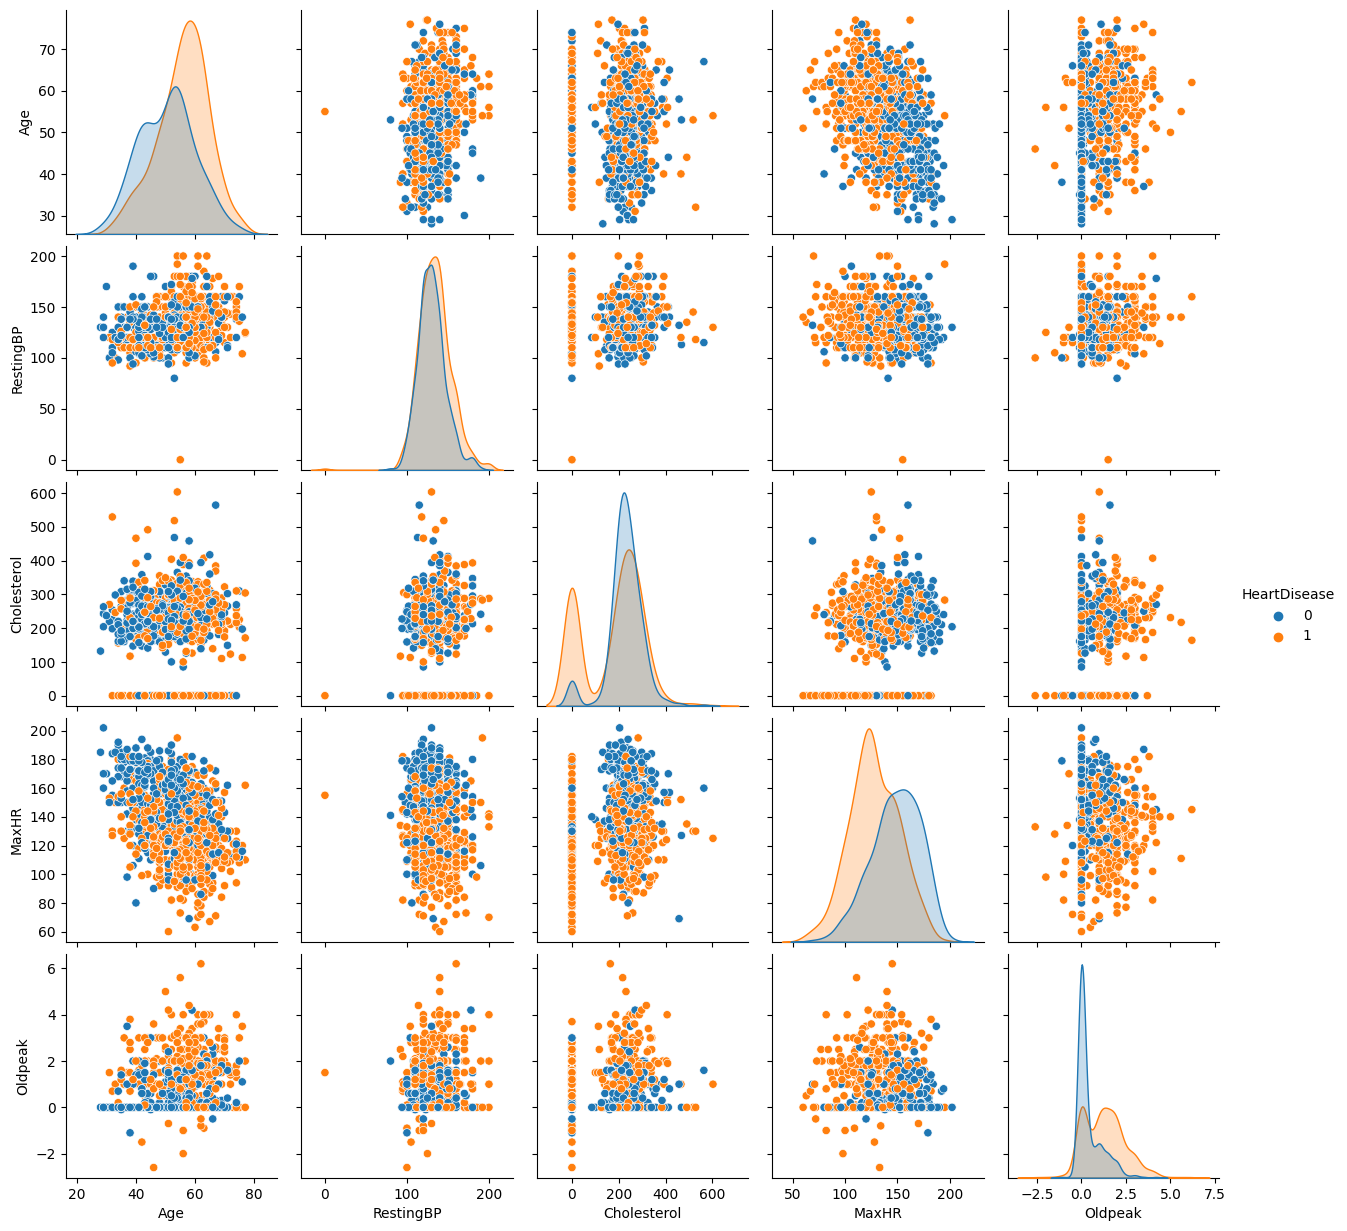

In [8]:
sns.pairplot(data = df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']],hue='HeartDisease')

Из графиков достаточно точно можно утверждать, что давление и холестирин являются достаточно сильными признаками, по которым можно разделить сердечные болезни

### 3. Разделите выборку на обучющее и тестовое подмножества.  80% данных оставить на обучающее множество, 20% на тестовое

In [9]:
# Name of columns 
col_name = list(df.columns)
col_name.remove('HeartDisease')

In [10]:
X = df[col_name]
y = df['HeartDisease']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### 4.Обучите дерево на обучащем множестве. Используйте следующие модели.

In [12]:
from sklearn import tree

In [13]:
# Создаём модель DecisionTree
clf = tree.DecisionTreeClassifier(random_state=42)

In [14]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

1.0

In [15]:
# Создаём модель RandomFores
clf_rf = RandomForestRegressor(random_state=42)
clf_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [16]:
clf_rf.score(X_train,y_train)

0.9347308200969049

### 5. Для тестового множества сделайте предсказенпие целевой переменной. Выведите метрики для каждой построенной модели с помощью metric.classifications_report

In [17]:
from sklearn import metrics

In [18]:
model = clf.fit(X_test,y_test)

In [19]:
### 6.

In [20]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



### 6. Выведите важность признаков, полученную после обучения модели из п.4b в виде столбчатой диаграммы.

In [21]:
model2 = clf_rf.fit(X_train, y_train)
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



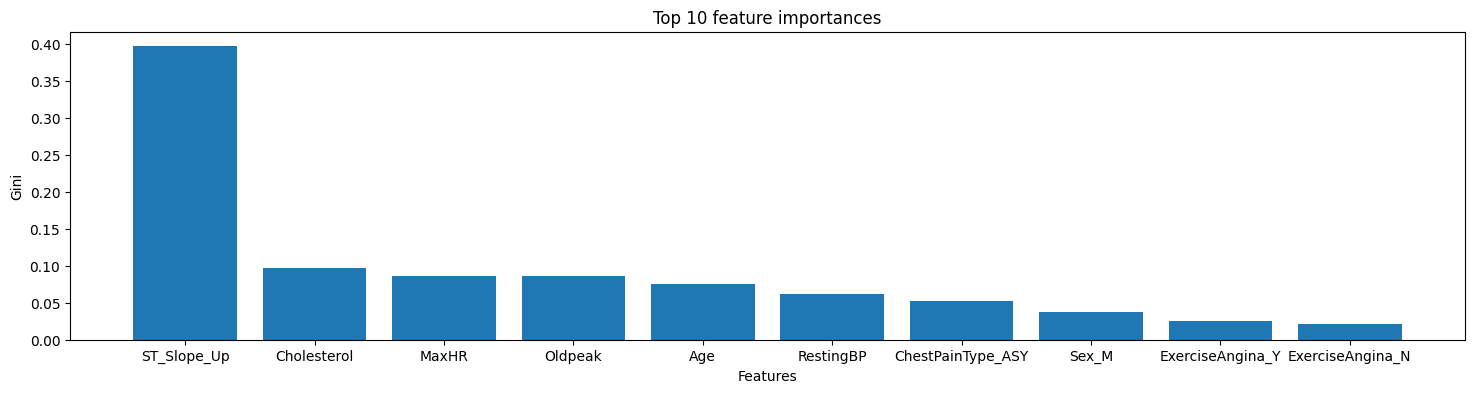

In [22]:
forest = RandomForestRegressor(random_state=10)
forest.fit(X_train, y_train)
imp = pd.Series(forest.feature_importances_)
imp.index = pd.Series(X_train.columns)
imp = imp.sort_values(ascending=False)
plt.figure(figsize=(18, 4))
plt.title('Top 10 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head(10).index, imp.head(10))
plt.show()

### 7. Обучите бэггинг над моделью из п. 4а, п. 4b. Исользуйте ensemble.BaggingClassifier

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import  BaggingClassifier

In [24]:
mod_bag = BaggingClassifier(random_state=42).fit(X_train,y_train)

print(metrics.classification_report(y_test,mod_bag.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84        77
           1       0.93      0.82      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



### 8. Обучите стекинг трёх моделей: из п.4а, п.4b и svm.LinearSVC

In [25]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
estimators = [
('decisiontree', tree.DecisionTreeClassifier(random_state=42)),
('randomforest', RandomForestClassifier(random_state=42))
]
modelClf = StackingClassifier(estimators=estimators, final_estimator=LinearSVC(random_state=10))
modelClf.fit(X_train, y_train)
predicted = modelClf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

